In [7]:
import pandas as pd

In [34]:
df = pd.read_csv('wines_SPA_proce.csv')

In [130]:
df.drop(columns='country', inplace=True)

In [11]:
df.drop(columns='Unnamed: 0', inplace=True)

In [35]:
df

,Unnamed: 0,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,mean_rate,rating_review,ph,mean_price_type,mean_price_wine_x,mean_price_winery,winery_id,wine_id
0,0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,4.606667,1.666667,11.836735,81.049923,208.924409,593.534000,38,22
1,1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,4.246025,2.000000,6.326531,75.461738,368.616250,80.448703,2,31
2,2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,4.673684,1.666667,373.541667,115.095126,824.797561,606.228842,22,23
3,3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,4.673684,1.666667,355.208333,115.095126,824.797561,606.228842,22,23
4,4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,4.673684,1.666667,272.708333,115.095126,824.797561,606.228842,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6065,6065,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,4.204831,1.333333,93.333333,44.556051,20.503389,42.033527,1,1
6066,6066,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,4.201493,1.333333,92.857143,109.540832,16.760000,17.085522,16,19
6067,6067,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,4.201493,1.333333,92.857143,38.835062,24.441750,24.717910,18,13
6068,6068,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,4.207767,1.666667,92.619048,115.095126,59.734836,65.666990,8,2


In [29]:
mean_price_year = df.groupby(['year'])['price'].mean().reset_index()

mean_price_year = mean_price_year.rename(columns={'price': 'mean_price_year'})

df = pd.merge(df, mean_price_year, on=['year'], how='left')

In [138]:
mean_price_combination = df.groupby(['body'])['price'].mean().reset_index()

mean_price_combination = mean_price_combination.rename(columns={'price': 'mean_price_combination'})

df = pd.merge(df, mean_price_combination, on=['body'], how='left')

In [30]:
mean_price_ph = df.groupby('ph')['price'].mean().reset_index()

mean_price_ph = mean_price_ph.rename(columns={'price': 'mean_price_ph'})

df = pd.merge(df, mean_price_ph, on='ph', how='left')

In [28]:
mean_price_region = df.groupby('region')['price'].mean().reset_index()

mean_price_region = mean_price_region.rename(columns={'price': 'mean_price_region'})

df = pd.merge(df, mean_price_region, on='region', how='left')

In [105]:
mean_price_winery = df.groupby('winery')['price'].mean().reset_index()
mean_price_winery = mean_price_winery.rename(columns={'price': 'mean_price_winery'})

df = pd.merge(df, mean_price_winery, on='winery', how='left')

In [99]:
mean_price_type = df.groupby('wine')['price'].mean().reset_index()

mean_price_type = mean_price_type.rename(columns={'price': 'mean_price_wine'})
df = pd.merge(df, mean_price_type, on='wine', how='left')

In [121]:
df['ph'] = df['body'] / df['acidity']

In [120]:
df['rating_review'] = df['num_reviews'] / df['rating']

In [84]:
mean_ratings = df.groupby('winery')['rating'].mean().reset_index()

mean_ratings = mean_ratings.rename(columns={'rating': 'mean_rate'})

df = pd.merge(df, mean_ratings, on='winery', how='left')

In [14]:
df['rating'].value_counts()

rating
4.2    4544
4.3     528
4.4     402
4.5     264
4.6     182
4.7     105
4.8      43
4.9       2
Name: count, dtype: int64

In [74]:
df = df[df['year'] != 'N.V.']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6070 non-null   int64  
 1   winery             6070 non-null   object 
 2   wine               6070 non-null   object 
 3   year               6070 non-null   int64  
 4   rating             6070 non-null   float64
 5   num_reviews        6070 non-null   int64  
 6   country            6070 non-null   object 
 7   region             6070 non-null   object 
 8   price              6070 non-null   float64
 9   type               6070 non-null   object 
 10  body               6070 non-null   float64
 11  acidity            6070 non-null   float64
 12  mean_rate          6070 non-null   float64
 13  rating_review      6070 non-null   float64
 14  ph                 6070 non-null   float64
 15  mean_price_type    6070 non-null   float64
 16  mean_price_wine_x  6070 

In [80]:

df['year'] =df['year'].astype(int)

C:\Users\migue\AppData\Local\Temp\ipykernel_14696\1221999443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] =df['year'].astype(int)


In [13]:
df['rating'].value_counts()

rating
4.2    4544
4.3     528
4.4     402
4.5     264
4.6     182
4.7     105
4.8      43
4.9       2
Name: count, dtype: int64

In [57]:
df['type'].value_counts()

type
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      863
Priorat Red              674
Toro Red                 296
Tempranillo              291
Albarino                 252
Mencia                   235
Rioja White               92
Grenache                  35
Cava                      33
Verdejo                   27
Pedro Ximenez             27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Sherry                     2
Name: count, dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   winery             6070 non-null   object 
 1   wine               6070 non-null   object 
 2   year               6070 non-null   int32  
 3   rating             6070 non-null   float64
 4   num_reviews        6070 non-null   int64  
 5   country            6070 non-null   object 
 6   region             6070 non-null   object 
 7   price              6070 non-null   float64
 8   type               6070 non-null   object 
 9   body               6070 non-null   float64
 10  acidity            6070 non-null   float64
 11  mean_rate          6070 non-null   float64
 12  rating_review      6070 non-null   float64
 13  ph                 6070 non-null   float64
 14  mean_price_type    6070 non-null   float64
 15  mean_price_wine_x  6070 non-null   float64
 16  mean_price_winery  6070 

In [112]:
winery_counts = df['winery'].value_counts()

winery_mapping = dict(zip(winery_counts.index, range(1, len(winery_counts) + 1)))

df['winery_id'] = df['winery'].map(winery_mapping)

In [116]:
wine_counts = df['wine'].value_counts()

wine_mapping = dict(zip(wine_counts.index, range(1, len(wine_counts) + 1)))

df['wine_id'] = df['wine'].map(wine_mapping)

In [78]:
df= df.dropna()

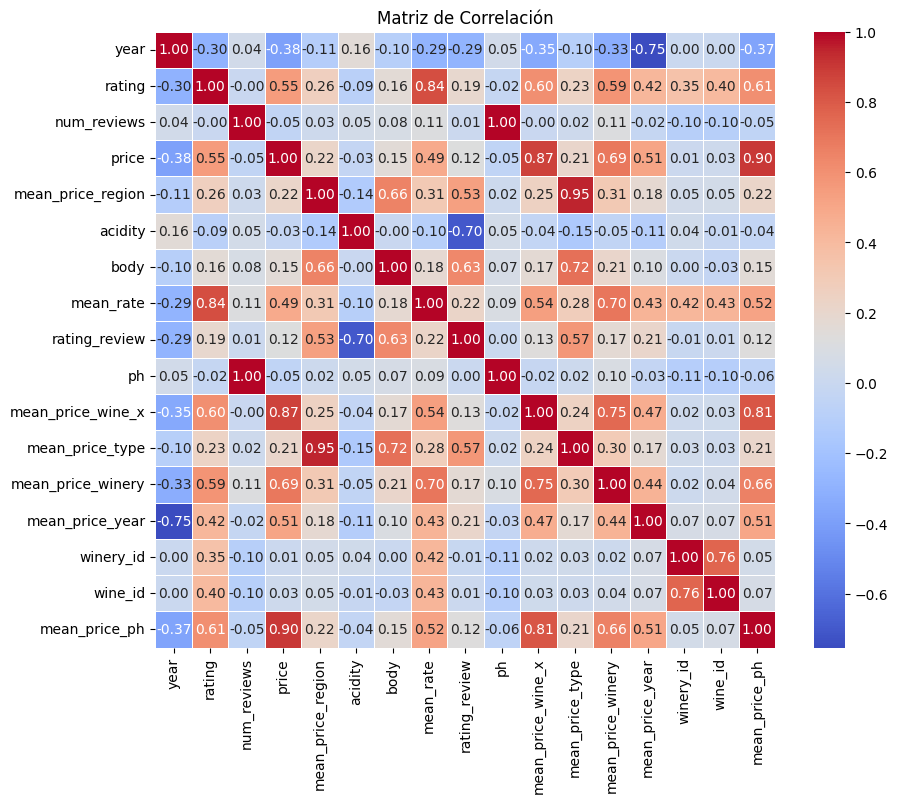

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['year', 'rating', 'num_reviews', 'price','mean_price_region', 'acidity', 'body', 'mean_rate','rating_review', 'ph', 'mean_price_wine_x','mean_price_type', 'mean_price_winery','mean_price_year', 'winery_id', 'wine_id', 'mean_price_ph' ]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [33]:
df.to_csv('wines_SPA_proce.csv', index=False)

In [9]:
df2 = pd.read_csv('wine_data.csv')

In [10]:
df2.head()

,Unnamed: 0,Name,Country,Brand,Categories,Tasting Notes,ABV,Food Pairing,Suggested Glassware,Suggested Serving Temperature,Sweet-Dry Scale,Body,Rating,Rate Count,Price,Volume,Description
0,0,Block 779 Cabernet Sauvignon Special Reserve,United States,Vineyard Block Estate,"Cabernet Sauvignon, Red Wine",NaN,NaN,NaN,Bordeaux Glass,NaN,Dry Wine,NaN,5.0,2,$36.83,NaN,"Napa's neighborhood for world-class reds, the ..."
1,1,Block 1015 Cabernet Sauvignon Oakville,United States,Vineyard Block Estate,"Cabernet Sauvignon, Red Wine",NaN,NaN,"Beef, Duck Game Bird",Bordeaux Glass,60-65° F,Dry Wine,Full,5.0,2,$24.99,NaN,NaN
2,2,Block 425 Zinfandel,United States,Vineyard Block Estate,"Red Wine, Zinfandel",NaN,NaN,NaN,Standard Red Glass,60-65° F,NaN,Medium,5.0,1,$22.99,NaN,NaN
3,3,Block 068 Old Vine Zinfandel,United States,Vineyard Block Estate,"Red Wine, Zinfandel",NaN,NaN,NaN,Standard Red Glass,60-65° F,NaN,Medium,5.0,1,$16.99,NaN,Ripe fruit and soft tannins make this a rich v...
4,4,Block 044 Old Vine Zinfandel,United States,Vineyard Block Estate,"Red Wine, Zinfandel",NaN,NaN,NaN,Standard Red Glass,60-65° F,NaN,Medium,5.0,1,$15.99,NaN,NaN


In [19]:
df2['Country'].value_counts()

Country
United States            9579
France                   5216
Italy                    3878
Spain                    1325
Argentina                1015
Chile                     847
Australia                 798
Portugal                  562
New Zealand               462
South Africa              452
Germany                   425
Japan                     386
Canada                    262
Israel                    242
Austria                   180
Europe                     70
Greece                     63
North America              43
Slovenia                   38
Mexico                     30
Bulgaria                   27
Brazil                     26
Republic of Georgia        23
Moldova                    19
Hungary                    12
Lebanon                    11
Uruguay                    10
United Kingdom             10
Armenia                     8
Peru                        6
India                       6
Oceania                     6
Romania                     6
Ne

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4855 entries, 9 to 26051
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4855 non-null   int64  
 1   Name                           4855 non-null   object 
 2   Country                        4855 non-null   object 
 3   Brand                          4855 non-null   object 
 4   Categories                     4855 non-null   object 
 5   ABV                            4855 non-null   float64
 6   Food Pairing                   4855 non-null   object 
 7   Suggested Glassware            4855 non-null   object 
 8   Suggested Serving Temperature  4855 non-null   int32  
 9   Sweet-Dry Scale                4855 non-null   object 
 10  Body                           4855 non-null   int32  
 11  Rating                         4855 non-null   float64
 12  Rate Count                     4855 non-null   int64

In [46]:
df2

,Name,Country,Brand,Categories,ABV,Food Pairing,Suggested Glassware,Suggested Serving Temperature,Sweet-Dry Scale,Body,Rating,Rate Count,Price,Description
9,Block 537 Merlot Dry Creek,France,Vineyard Block Estate,"Merlot, Red Wine",13.9,"Duck Game Bird, Tomatoes",Bordeaux Glass,60,Dry Wine,2,5.0,1,20.99,"The wine is velvety and lush, with aromas and ..."
10,Block 049 Merlot,France,Vineyard Block Estate,"Merlot, Red Wine",14.5,"Duck Game Bird, Tomatoes",Bordeaux Glass,60,Dry Wine,2,5.0,1,21.99,Ripe and velvety on the palate. The aromas are...
47,Block 723 Cabernet Sauvignon,France,Vineyard Block Estate,"Cabernet Sauvignon, Red Wine",14.2,"Beef, Duck Game Bird",Bordeaux Glass,60,Dry Wine,1,5.0,1,23.99,Wild blackberry and forest floor notes enthusi...
48,Block 426 Cabernet Sauvignon Chalk Hill,United States,Vineyard Block Estate,"Cabernet Sauvignon, Red Wine",14.7,"Beef, Duck Game Bird",Bordeaux Glass,60,Dry Wine,1,5.0,1,19.99,Dense aromas of dark chocolate and toasted van...
73,Kelleher Block 21 Sauvignon Blanc,France,Vineyard Block Estate,"Sauvignon Blanc, White Wine",14.5,"Chicken, Cheese - Fresh Soft",Standard White Glass,45,Dry Wine,3,5.0,1,29.99,"The aromas are dominated by tropical notes, as..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26034,Abbazia di Novacella Pinot Grigio,Italy,Abbazia di Novacella,"Pinot Grigio, White Wine",13.5,"Shellfish, Salads Greens",Standard White Glass,45,Dry Wine,3,5.0,1,20.99,The color is a combination of yellow with gree...
26035,Angelo Bufani Pinot Grigio,France,Angelo Bufani,"Pinot Grigio, White Wine",12.0,"Shellfish, Salads Greens",Standard White Glass,45,Dry Wine,3,5.0,1,8.99,Angelo Bufani Pinot Grigio is produced only fr...
26042,Allan Scott Sauvignon Blanc,New Zealand,Allan Scott,"Sauvignon Blanc, White Wine",12.0,"Chicken, Cheese - Fresh Soft",Standard White Glass,45,Dry Wine,3,5.0,1,14.99,Allan Scott consistently produces amongst the ...
26049,Andis Wines Sauvignon Blanc,United States,Andis,"Sauvignon Blanc, White Wine",12.9,"Chicken, Cheese - Fresh Soft",Standard White Glass,45,Dry Wine,3,4.7,17,18.49,One of our favorite times of the year is just ...


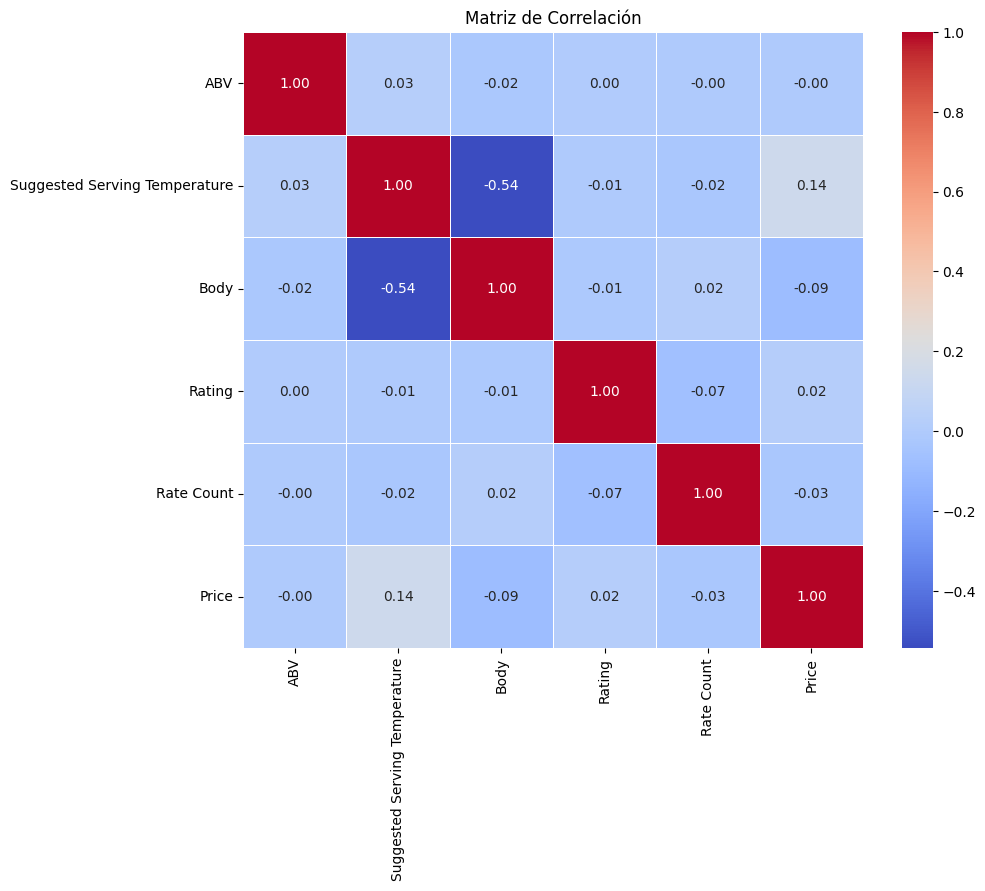

In [50]:
corr2 = df2[['ABV', 'Suggested Serving Temperature', 'Body', 'Rating', 'Rate Count', 'Price']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [43]:
df2.drop(columns='Unnamed: 0', inplace=True)

In [38]:
df2['Body'].value_counts()

Body
Full      2382
Light     1475
Medium     998
Name: count, dtype: int64

In [40]:
mapping = {'Full': 1, 'Medium': 2, 'Light': 3}

df2['Body'] = df2['Body'].map(mapping).astype(int)

In [33]:
df2['Suggested Serving Temperature'].value_counts()

Suggested Serving Temperature
60-65° F    2151
45-50° F    1192
50-55° F    1052
55-60° F     453
70-75° F       3
65-70° F       2
40-45° F       1
35-40° F       1
Name: count, dtype: int64

In [34]:
df2['Suggested Serving Temperature'] = df2['Suggested Serving Temperature'].str.extract('(\d{2})').astype(int)


In [30]:
df2['ABV'] = df2['ABV'].replace('[\%,]', '', regex=True).astype(float)

In [28]:
df2['Price'] = df2['Price'].replace('[\$,]', '', regex=True).astype(float)

In [26]:
df2['Suggested Glassware'].value_counts()

Suggested Glassware
Bordeaux Glass               1499
Standard White Glass         1192
Chardonnay Glass             1051
Standard Red Glass            653
Burgundy  Bourgogne Glass     455
Copita Glass                    4
Flute                           1
Name: count, dtype: int64

In [22]:
df2.dropna(inplace=True)

In [13]:
df2.drop(columns='Volume', inplace=True)

In [15]:
df2.drop(columns='Tasting Notes', inplace=True)

In [45]:
df2.to_csv("wine_data.csv")

In [63]:
df3=pd.read_csv('wine-quality-white-and-red.csv')

In [64]:
df3

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
df3['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


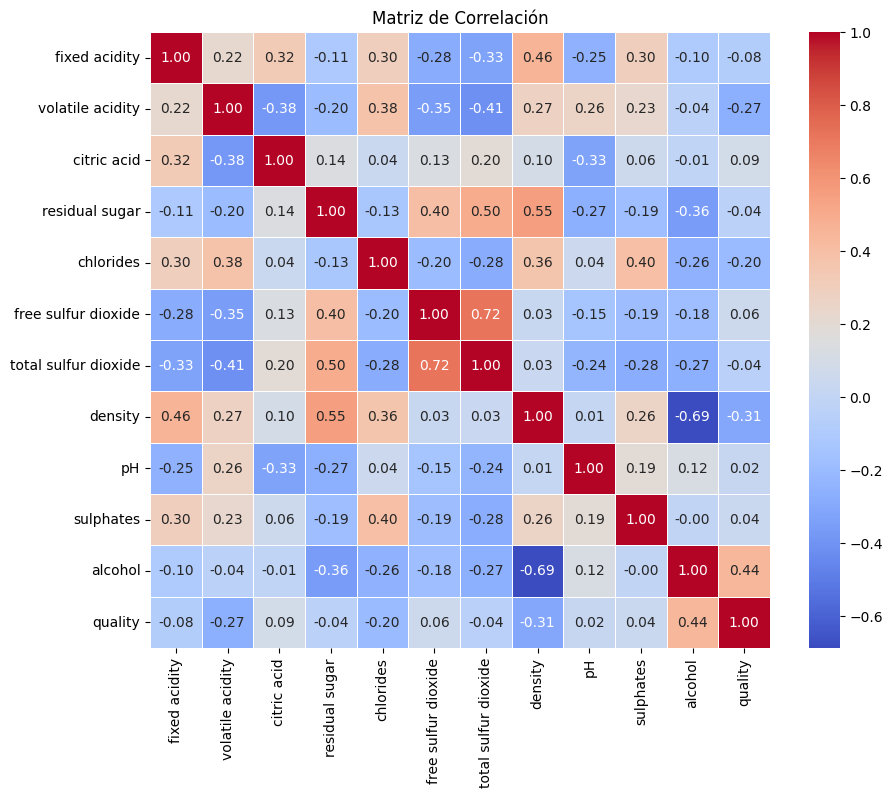

In [69]:
corr3 = df3.iloc[:,1:].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr3, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
X = df2[['year','num_reviews', 'price', 'rating ponderado','mean_price_region', 'rating_normalizado', 'acidity', 'body', 'mean_rate','rating_review', 'ph', 'mean_price_wine_x','mean_price_type', 'mean_price_winery','mean_price_year', 'winery_id', 'wine_id', 'mean_price_ph'] ]
y = df2['valoracion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

In [ ]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3]
}

svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
}

search_space = [
    logistic_params,
    random_forest_params,
    svm_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf.fit(X_train, y_train)

In [ ]:
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)